# 1. Unemployment Analysis in India

> This code examines unemployment trends in India by utilizing two datasets:
>
> * **Unemployment in India**: Contains regional data on unemployment across various parts of the country.
> * **Unemployment Rate up to November 2020**: A time-series dataset providing monthly unemployment figures up to November 2020.



### Import necessary libraries

In [30]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [31]:
data1 = pd.read_csv("datasets/Unemployment_in_India.csv")
data2 = pd.read_csv("datasets/Unemployment_Rate_upto_nov_2020.csv")


First analyse unemployment data by region

In [32]:
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [34]:
data1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [35]:
data1.shape

(768, 7)

### Data Cleaning ###

In [36]:
data1.columns = data1.columns.str.strip()

In [37]:
# Handling missing values
data1.dropna(inplace=True)

In [38]:
data1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

### Exploratory Data Analysis

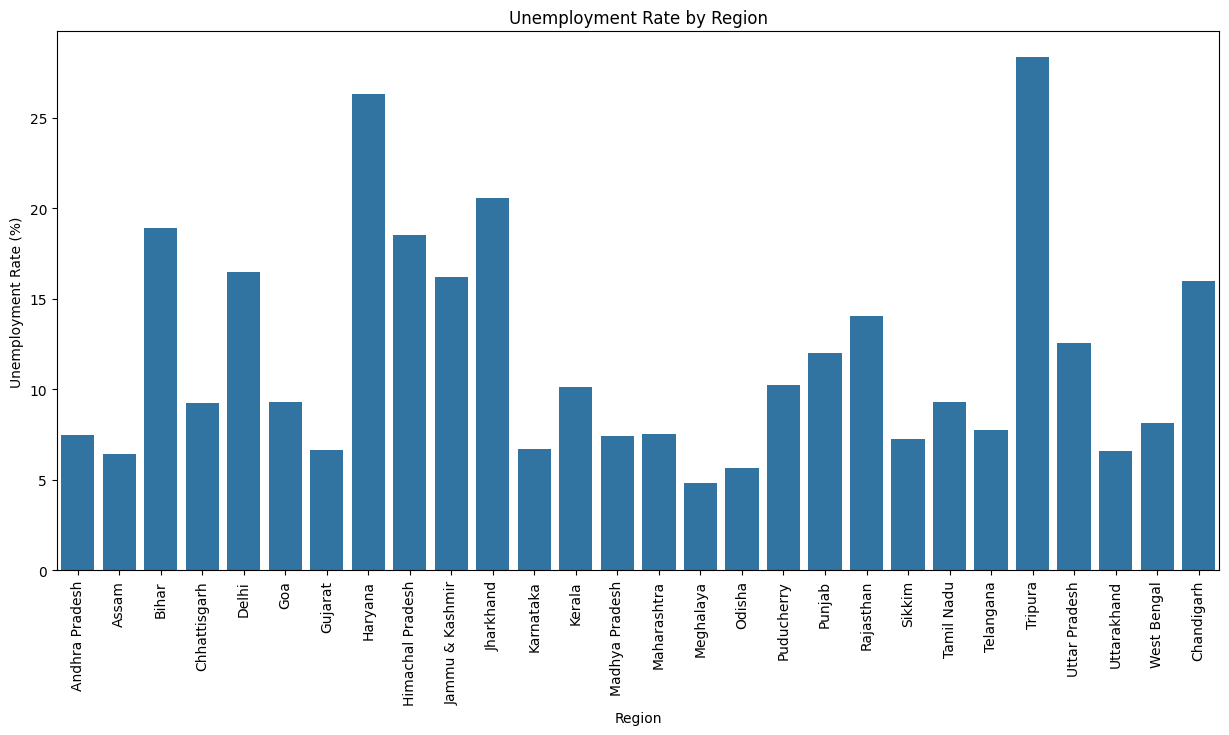

In [39]:

# 1. Unemployment Rate Distribution by Region
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=data1, ci=None)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

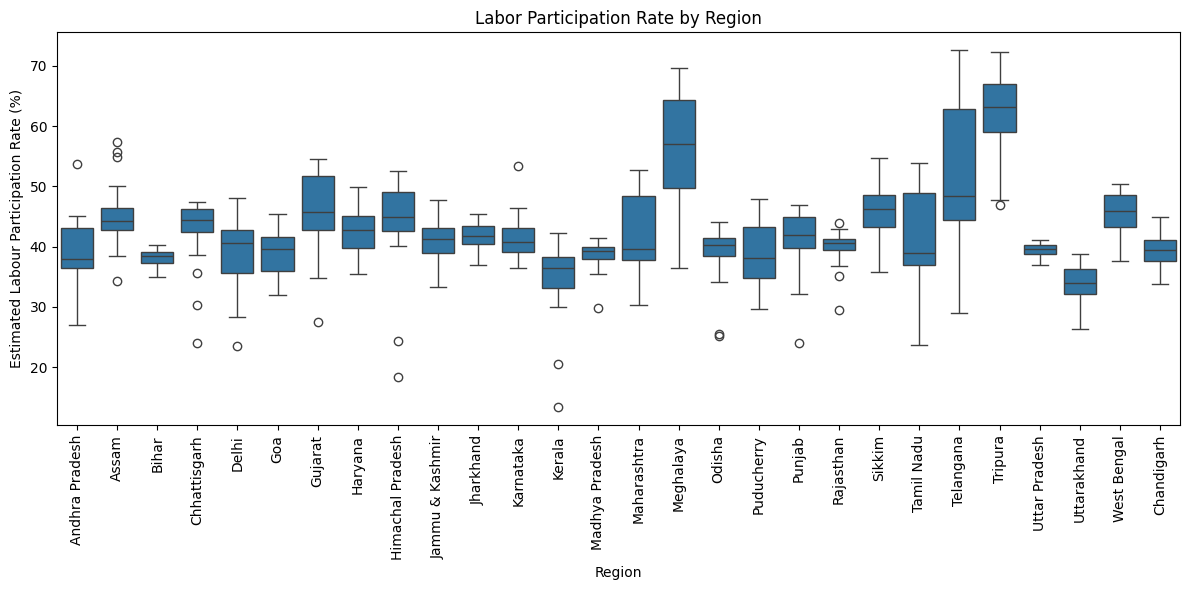

In [40]:
# 2. Box Plot for Labor Participation Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y="Estimated Labour Participation Rate (%)", data=data1)
plt.title("Labor Participation Rate by Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
#Average Metrics by Region
avg_metrics = data1.groupby('Region')[['Estimated Unemployment Rate (%)', 
                                       'Estimated Labour Participation Rate (%)']].mean()


In [42]:
avg_metrics

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,
Andhra Pradesh,7.477143,39.375714
Assam,6.428077,44.868462
Bihar,18.918214,38.153929
Chandigarh,15.991667,39.336667
Chhattisgarh,9.240357,42.810714
Delhi,16.495357,38.929643
Goa,9.274167,39.249583
Gujarat,6.663929,46.101071
Haryana,26.283214,42.737143


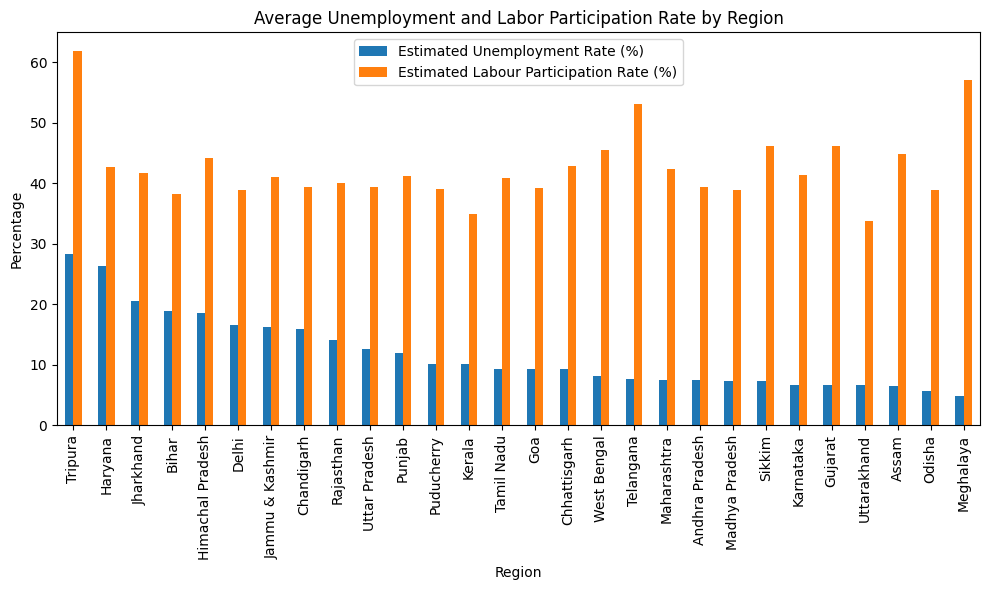

In [43]:
# 3. Average Unemployment Rate Plot
avg_metrics.sort_values(by="Estimated Unemployment Rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

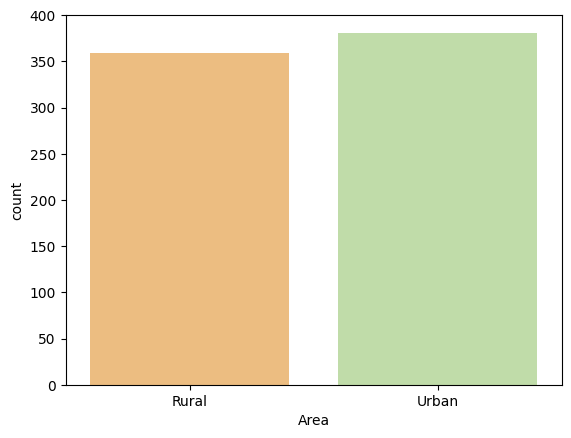

In [44]:
#4. Area-wise Data
data1["Area"].value_counts()
sns.countplot(x="Area",data=data1,palette="Spectral")
plt.show()

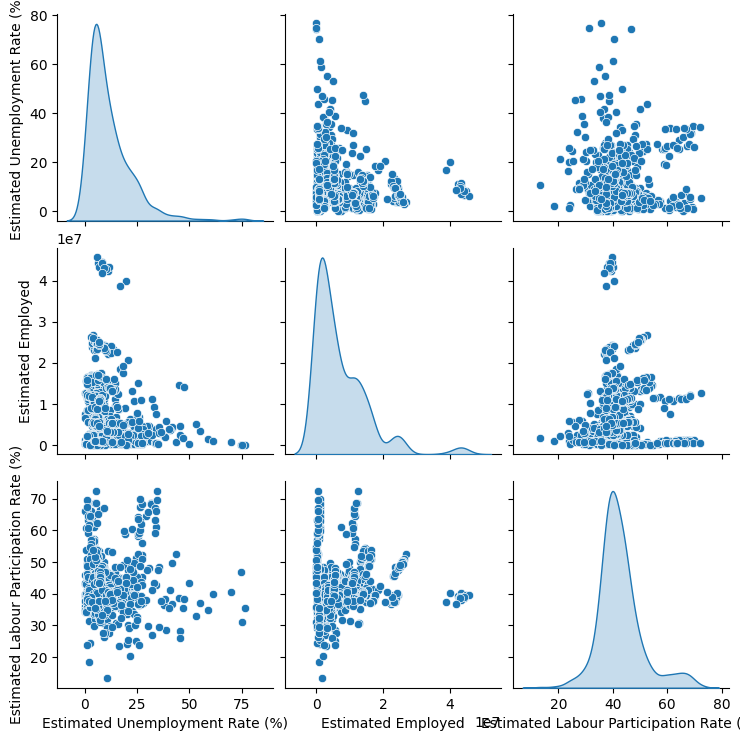

<Figure size 1200x600 with 0 Axes>

In [ ]:
# 5. Pair Plot for Key Metrics
pair_data = data1[["Estimated Unemployment Rate (%)", "Estimated Employed", 
                   "Estimated Labour Participation Rate (%)"]]
sns.pairplot(pair_data, diag_kind="kde", palette="husl", markers="o")
plt.suptitle("Relationship Between Key Metrics", y=1.02)
plt.show()

# 2. Analysis of data about Unemployment Rate up to November 2020

In [46]:
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [47]:
data2.describe

<bound method NDFrame.describe of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.

In [48]:
data2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [49]:
data2.columns = data2.columns.str.strip()

In [50]:
print(data2.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [51]:
data2.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [52]:
data2.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [53]:
# Converting 'Date' column to datetime
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')
data2 = data2.dropna(subset=['Date'])


In [54]:
# Filtering data
covid_data = data2[data2['Date'].dt.year == 2020]


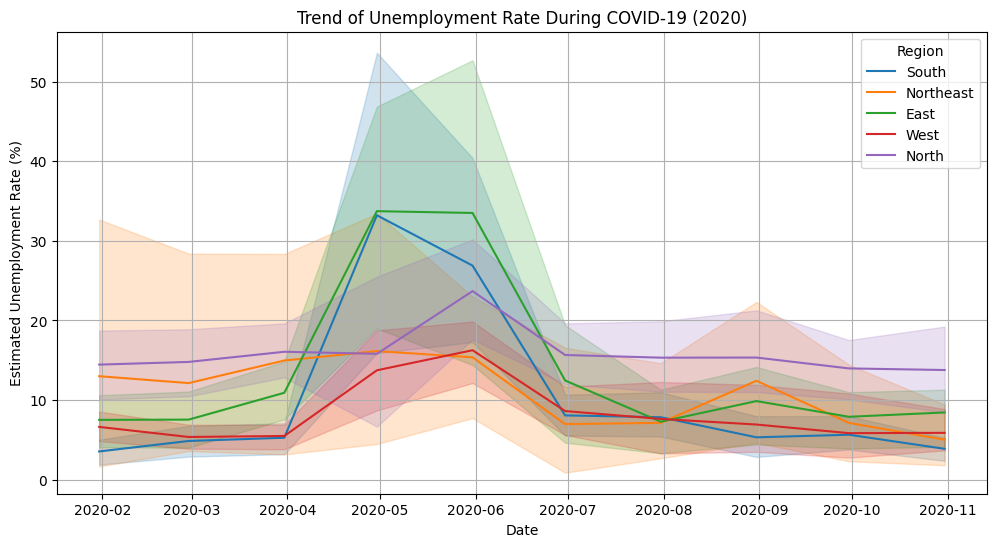

In [55]:
# Q1: What was the overall trend in unemployment during COVID-19?
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_data, x='Date', y='Estimated Unemployment Rate', hue='Region', palette='tab10')
plt.title("Trend of Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.show()

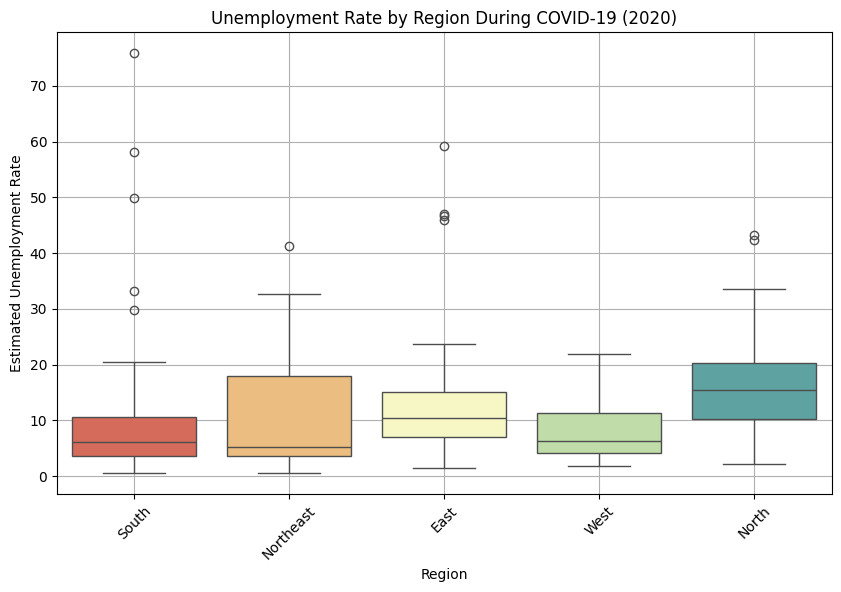

In [56]:
# Q2: Which regions were most affected during the COVID-19 pandemic?
plt.figure(figsize=(10, 6))
sns.boxplot(data=covid_data, x='Region', y='Estimated Unemployment Rate', palette='Spectral')
plt.title("Unemployment Rate by Region During COVID-19 (2020)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


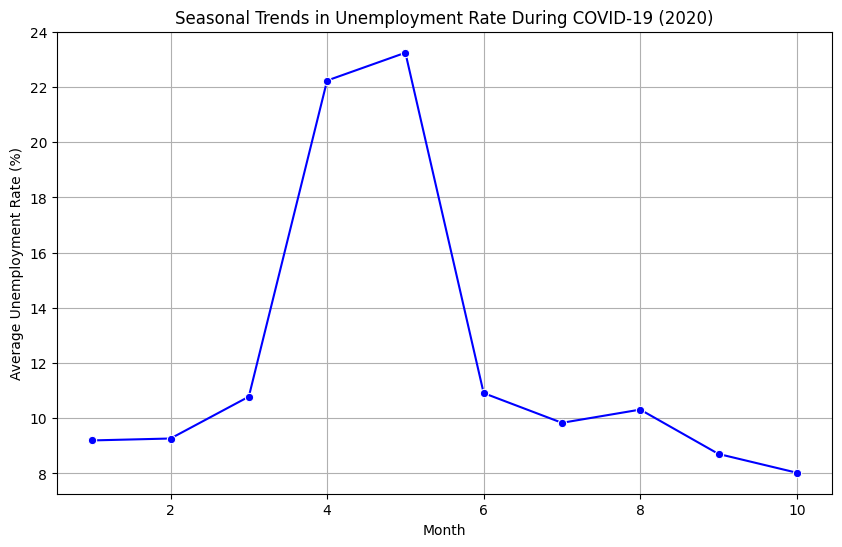

In [57]:
# Q3: Were there any seasonal trends in unemployment during the pandemic?
covid_data['Month'] = covid_data['Date'].dt.month
monthly_avg = covid_data.groupby('Month')['Estimated Unemployment Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate', data=monthly_avg, marker='o', color='blue')
plt.title("Seasonal Trends in Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.show()

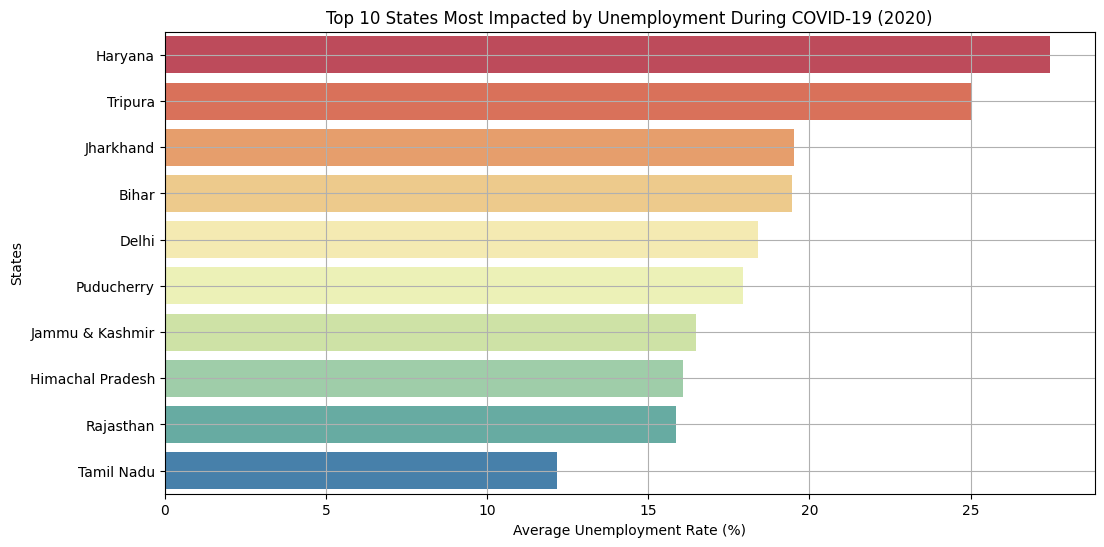

In [58]:
# Q4: States most impacted by unemployment during COVID-19
state_avg = covid_data.groupby('States')['Estimated Unemployment Rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='Spectral')
plt.title("Top 10 States Most Impacted by Unemployment During COVID-19 (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("States")
plt.grid(True)
plt.show()


### Final Verdict

1. **Unemployment Patterns**: The Northern and Eastern parts of India experience elevated unemployment levels, suggesting the presence of regional disparities.

2. **Workforce Engagement**: Generally, as the labor participation rate increases, the unemployment rate tends to decrease, highlighting the importance of encouraging workforce involvement.

3. **Effect of COVID-19**: The pandemic led to a significant surge in unemployment nationwide, with some states being more severely impacted than others.
   The recovery process varied across regions, with some areas requiring more time to return to pre-pandemic conditions.
